In [165]:
import pandas as pd
import numpy as np

In [130]:
import psycopg2

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

**Загрузка данных из Postgres (финальный датасет уже собран в Postgres)**

In [106]:
conn = psycopg2.connect(dbname='postgres', user='postgres', password='12345678', host='127.0.0.1')

In [107]:
cursor = conn.cursor()

In [108]:
cursor.execute('SELECT * FROM "DATASET"')
dataset = cursor.fetchall()
cursor.close() # закрываем курсор
conn.close() # закрываем соединение

In [160]:
df = pd.DataFrame(dataset, columns = ["AGREEMENT_RK", "TARGET", "AGE", "SOCSTATUS_WORK_FL", "SOCSTATUS_PENS_FL", 
                                 "GENDER", "CHILD_TOTAL", "DEPENDANTS", "PERSONAL_INCOME", "LOANS_NUMBER", "CLOSED_LOANS_NUMBER"])

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGREEMENT_RK         15523 non-null  object 
 1   TARGET               15523 non-null  object 
 2   AGE                  15523 non-null  object 
 3   SOCSTATUS_WORK_FL    15523 non-null  object 
 4   SOCSTATUS_PENS_FL    15523 non-null  object 
 5   GENDER               15523 non-null  object 
 6   CHILD_TOTAL          15523 non-null  object 
 7   DEPENDANTS           15523 non-null  object 
 8   PERSONAL_INCOME      15523 non-null  float64
 9   LOANS_NUMBER         15523 non-null  int64  
 10  CLOSED_LOANS_NUMBER  15523 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB


**Предобработка данных**

In [162]:
numeric_list = ["AGE", "CHILD_TOTAL", "DEPENDANTS", "CLOSED_LOANS_NUMBER"]

for i in numeric_list:
    df[i] = df[i].astype("int")

In [164]:
df.describe(include = ["object"])

,AGREEMENT_RK,TARGET,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER
count,15523,15523,15523,15523,15523
unique,15223,2,2,2,2
top,61523485,0,1,0,1
freq,2,13670,14116,13433,10152


In [491]:
df.describe(include = np.number)

,TARGET,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOANS_NUMBER,CLOSED_LOANS_NUMBER,TARGET_ENC,SOCSTATUS_WORK_FL1,SOCSTATUS_PENS_FL1,GENDER1,TARGET1,INCOME
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,8372.000000
mean,0.119030,40.406096,1.099389,0.645208,13853.836323,1.387769,0.751889,0.119030,0.909610,0.134468,0.654536,0.119030,8579.879024
std,0.323835,11.601068,0.995411,0.812252,9015.467617,0.793566,0.988499,0.323835,0.286748,0.341165,0.475535,0.323835,2248.571308
min,0.000000,21.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,0.000000,30.000000,0.000000,0.000000,8000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7000.000000
50%,0.000000,39.000000,1.000000,0.000000,12000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9000.000000
75%,0.000000,50.000000,2.000000,1.000000,17000.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,10000.000000
max,1.000000,67.000000,10.000000,7.000000,250000.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12000.000000


In [181]:
df.duplicated().sum()

300

In [179]:
duplicates = df[df.duplicated(subset=df.columns.difference(['TARGET']))]

In [180]:
duplicates

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOANS_NUMBER,CLOSED_LOANS_NUMBER
660,66767641,1,26,1,0,1,0,0,13000.0,1,1
861,64602100,0,41,1,0,1,5,4,8000.0,2,2
1397,63099901,0,28,1,0,0,0,0,10000.0,1,0
1540,65219965,0,43,1,0,1,3,2,5500.0,1,0
2200,63910992,1,24,1,0,0,1,0,12000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15324,62364330,0,29,1,0,1,1,1,11000.0,1,0
15431,63635277,0,47,1,0,0,0,0,12000.0,1,1
15475,62488977,0,52,1,0,1,0,0,7000.0,1,1
15485,61371518,0,29,1,0,0,0,0,18000.0,1,1


In [182]:
df.drop_duplicates(subset = df.columns.difference(['TARGET']), keep = "first", inplace = True)

In [183]:
df.duplicated().sum()

0

**Построение графиков для Streamlit-приложения**

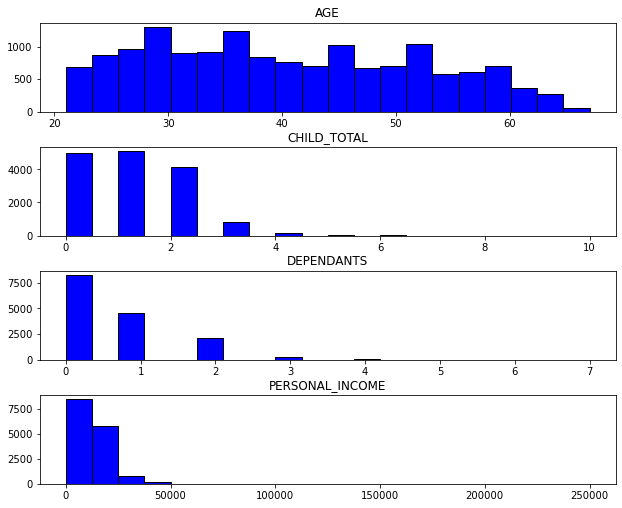

In [202]:
numeric_list = ["AGE", "CHILD_TOTAL", "DEPENDANTS", "PERSONAL_INCOME"]

fig, ax = plt.subplots(4,1, figsize=(10,8))

for i in range(4):
    ax[i].hist(df[numeric_list[i]], color = 'blue', edgecolor = 'black', bins = 20)
    ax[i].set_title(f"{numeric_list[i]}")
 
plt.subplots_adjust(left=0.1,
            bottom=0.1, 
            right=0.9, 
            top=0.9, 
            wspace=0.4, 
            hspace=0.4)


In [209]:
df["TARGET"].value_counts()

0    13411
1     1812
Name: TARGET, dtype: int64

In [212]:
df[["TARGET", "SOCSTATUS_WORK_FL", "SOCSTATUS_PENS_FL","GENDER", "LOANS_NUMBER", "CLOSED_LOANS_NUMBER"]].sum()

TARGET                  1812
SOCSTATUS_WORK_FL      13847
SOCSTATUS_PENS_FL       2047
GENDER                  9964
LOANS_NUMBER           21126
CLOSED_LOANS_NUMBER    11446
dtype: object

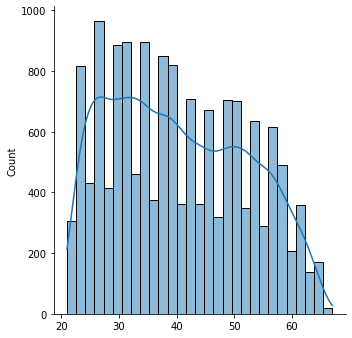

In [271]:
sns.displot(df["AGE"], kde = True).set(xlabel= None)

In [237]:
df["PERSONAL_INCOME"].describe()

count     15223.000000
mean      13853.836323
std        9015.467617
min          24.000000
25%        8000.000000
50%       12000.000000
75%       17000.000000
max      250000.000000
Name: PERSONAL_INCOME, dtype: float64

(array([1246.,  765., 1870.,  469., 1115.,  486.,  423., 1743.,  353.,
         334.]),
 array([ 8000.,  8900.,  9800., 10700., 11600., 12500., 13400., 14300.,
        15200., 16100., 17000.]),
 <BarContainer object of 10 artists>)

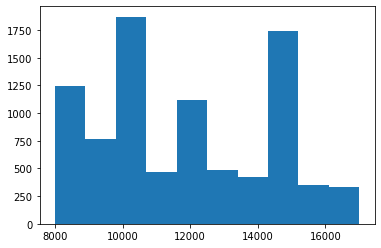

In [252]:
plt.hist(income_regular["PERSONAL_INCOME"])

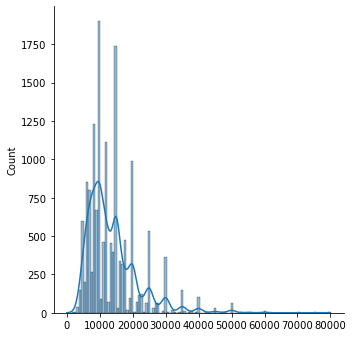

In [269]:
sns.displot(income_regular["PERSONAL_INCOME"], kde = True).set(xlabel= None)

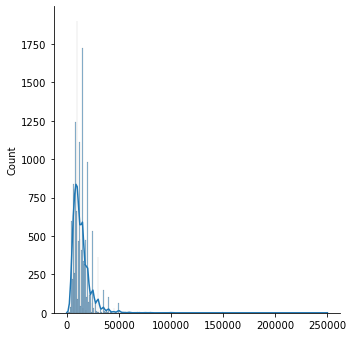

In [270]:
sns.displot(df["PERSONAL_INCOME"], kde = True).set(xlabel= None)

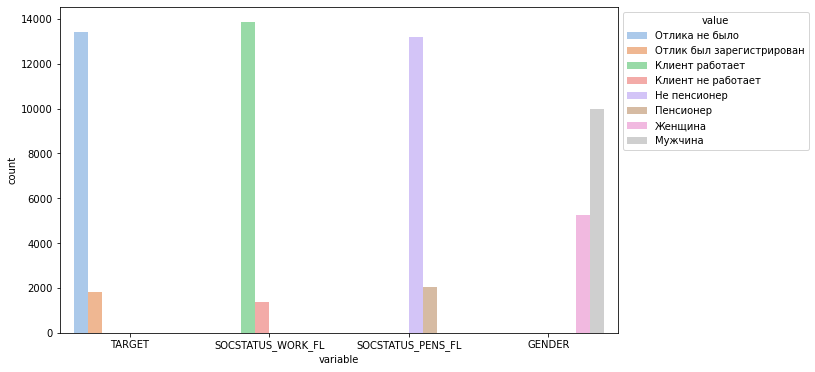

In [307]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'variable', hue = "value", data = pd.melt(df[["TARGET", "SOCSTATUS_WORK_FL", "SOCSTATUS_PENS_FL", "GENDER"]]), palette = "pastel")
sns.move_legend(ax, 'upper left', bbox_to_anchor = (1,1))
plt.show()


In [291]:
df["TARGET"] = df["TARGET"].apply(lambda x: "Отлик был зарегистрирован" if x == 1 else "Отлика не было")

In [403]:
df["TARGET"] = df["TARGET"].apply(lambda x: 1 if x == "Отлик был зарегистрирован" else 0)

In [293]:
df["SOCSTATUS_WORK_FL"] = df["SOCSTATUS_WORK_FL"].apply(lambda x: "Клиент работает" if x == 1 else "Клиент не работает")

In [386]:
df["SOCSTATUS_WORK_FL1"] = df["SOCSTATUS_WORK_FL"].apply(lambda x: 1 if x == "Клиент работает" else 0)

In [387]:
df["SOCSTATUS_PENS_FL1"] = df["SOCSTATUS_PENS_FL"].apply(lambda x: 1 if x== "Пенсионер" else 0)

In [388]:
df["GENDER1"] = df["GENDER"].apply(lambda x: 1 if x == "Мужчина" else 0)

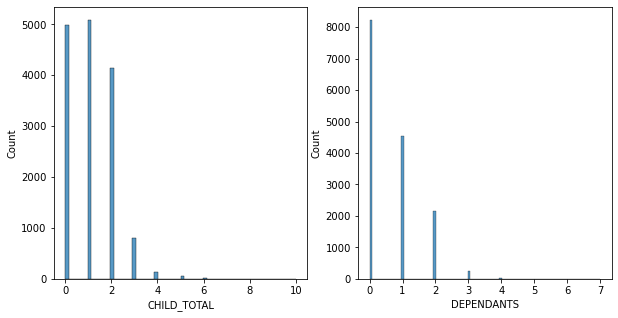

In [329]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

ax[0] = sns.histplot(df["CHILD_TOTAL"], ax=ax[0])
ax[1] = sns.histplot(df["DEPENDANTS"], ax=ax[1])



<AxesSubplot:xlabel='LOANS_NUMBER', ylabel='Count'>

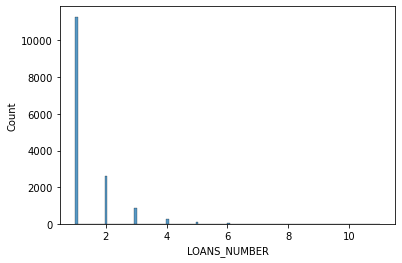

In [351]:
sns.histplot(df["LOANS_NUMBER"])
# sns.histplot(df["CLOSED_LOANS_NUMBER"])

<AxesSubplot:>

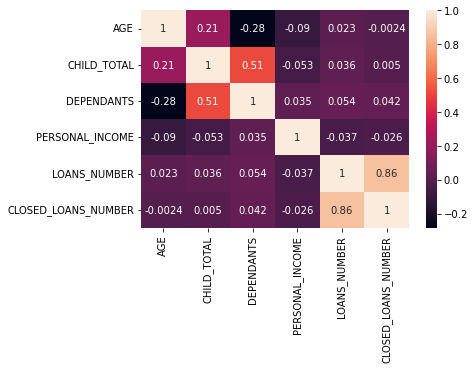

In [365]:
corr = df.select_dtypes('number').corr()

sns.heatmap(corr, annot = True)

<AxesSubplot:xlabel='PERSONAL_INCOME'>

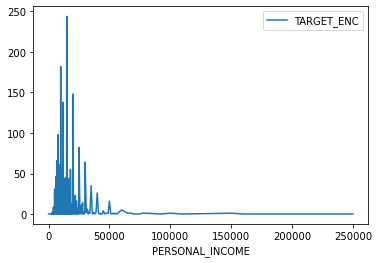

In [391]:
df.groupby("PERSONAL_INCOME")[["TARGET_ENC"]].sum().plot()
df.groupby("AGE")[["TARGET_ENC"]].sum().plot()

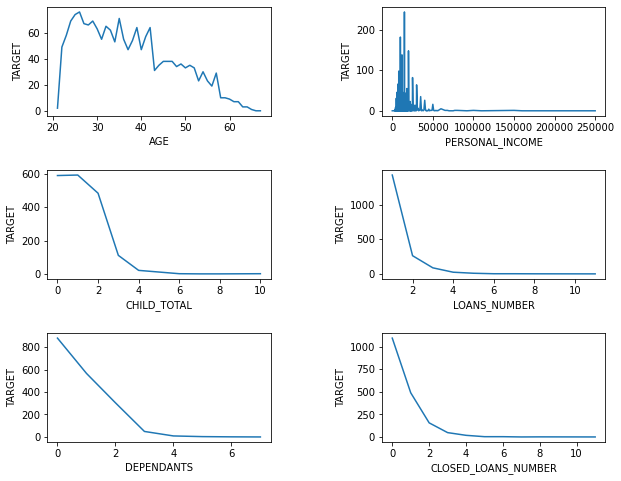

In [439]:
fig, ax = plt.subplots(3, 2,figsize = (10,8))

ax[0][0].plot(df.groupby('AGE')[["TARGET"]].sum())
ax[1, 0].plot(df.groupby("CHILD_TOTAL")[["TARGET"]].sum())
ax[2, 0].plot(df.groupby("DEPENDANTS")[["TARGET"]].sum())
ax[0, 1].plot(df.groupby("PERSONAL_INCOME")[["TARGET"]].sum())
ax[1, 1].plot(df.groupby("LOANS_NUMBER")[["TARGET"]].sum())
ax[2, 1].plot(df.groupby("CLOSED_LOANS_NUMBER")[["TARGET"]].sum())


ax[0][0].set_xlabel("AGE")
ax[1, 0].set_xlabel("CHILD_TOTAL")
ax[2, 0].set_xlabel("DEPENDANTS")
ax[0, 1].set_xlabel("PERSONAL_INCOME")
ax[1, 1].set_xlabel("LOANS_NUMBER")
ax[2, 1].set_xlabel("CLOSED_LOANS_NUMBER")

ax[0][0].set_ylabel("TARGET")
ax[1, 0].set_ylabel("TARGET")
ax[2, 0].set_ylabel("TARGET")
ax[0, 1].set_ylabel("TARGET")
ax[1, 1].set_ylabel("TARGET")
ax[2, 1].set_ylabel("TARGET")

plt.subplots_adjust(hspace = 0.5, wspace=0.5) 


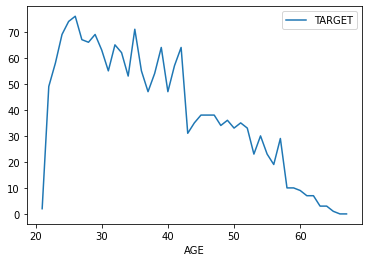

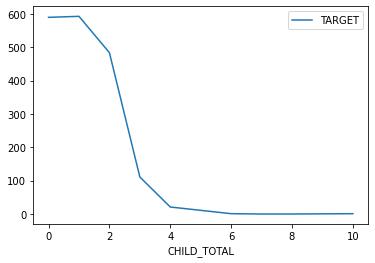

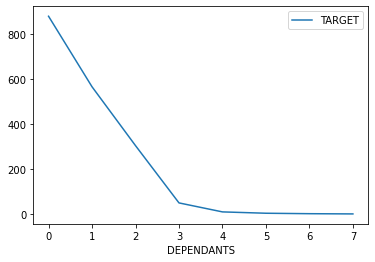

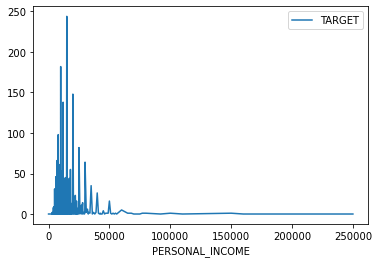

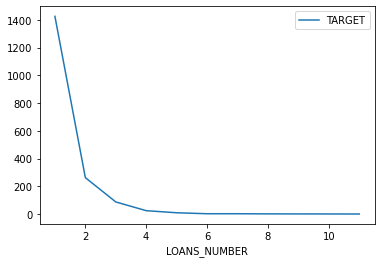

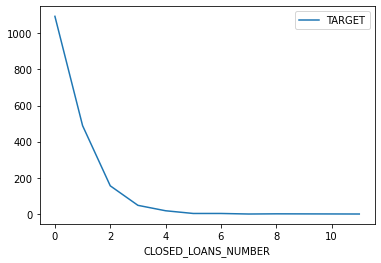

In [404]:
ax, fig plt.subplots(6,1)

df1 = ["AGE", "CHILD_TOTAL", "DEPENDANTS", "PERSONAL_INCOME", "LOANS_NUMBER", "CLOSED_LOANS_NUMBER"]

for i in df1: 
    df.groupby(i)[["TARGET"]].sum().plot()


<AxesSubplot:xlabel='SOCSTATUS_PENS_FL'>

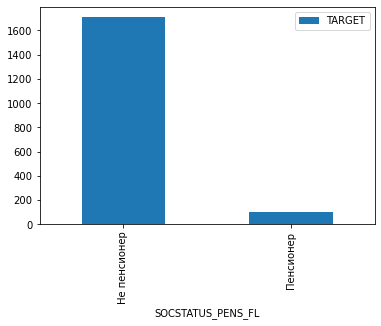

In [452]:
df.groupby("SOCSTATUS_PENS_FL")[["TARGET"]].sum().plot.bar()

<AxesSubplot:xlabel='GENDER'>

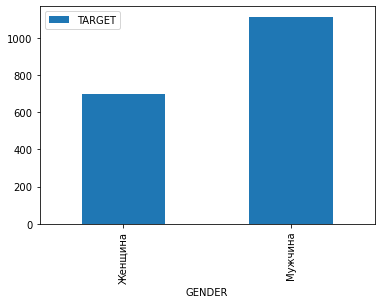

In [466]:
df.groupby("GENDER")[["TARGET"]].sum().plot.bar()
